In [178]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [179]:
plt.rcParams["figure.figsize"] = (16,10)

# 0 - Baixar dataset

**Dataset (Henrique B.)**

In [180]:
notebook_path = os.path.abspath("fraude.ipynb")
notebook_dir = os.path.dirname(notebook_path)
dataset_path = f'{notebook_dir}/fraude.csv'

**Baixar dataset (Henrique M.) - por kaggle.json**

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [183]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [184]:
!kaggle datasets download -d ealaxi/paysim1

paysim1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [185]:
!unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [186]:
src = os.listdir()[2]
os.rename(src, "fraud.csv")
os.listdir()

['kaggle.json',
 'paysim1.zip',
 'fraud.csv',
 'PS_20174392719_1491204439457_log.csv',
 '.ipynb_checkpoints']

In [187]:
dataset_path = "fraud.csv"

Ler CSV

In [188]:
df = pd.read_csv(dataset_path)

# 1 - Análise do Dataset

In [189]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [190]:
df.shape

(6362620, 11)

In [191]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**1.1 - Verificando nulos**

In [193]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**1.2 - Tirando linhas duplicadas**

In [194]:
df.drop_duplicates(inplace=True)

In [195]:
df.shape

(6362620, 11)

**1.3 - Visualizar variáveis categóricas**

In [196]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [197]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

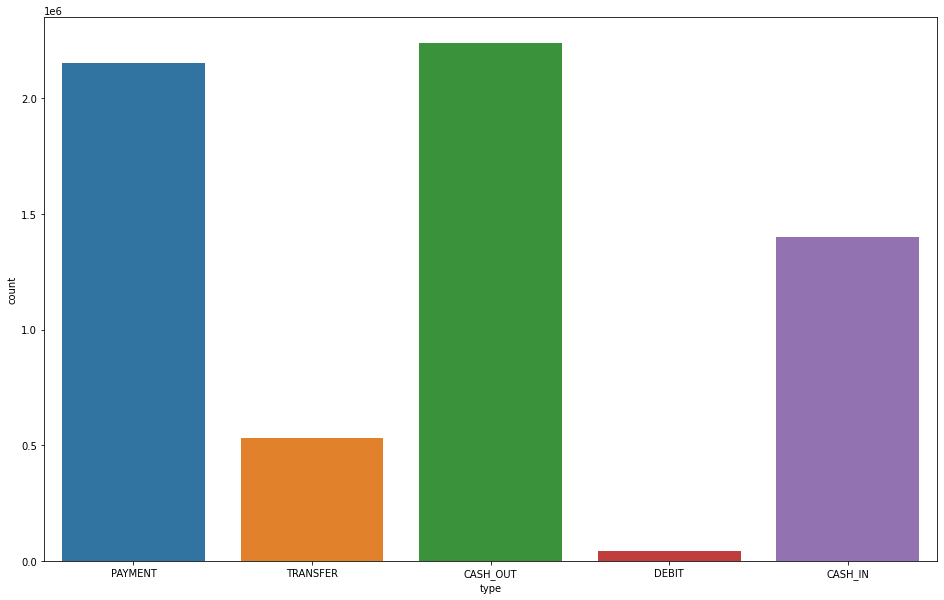

In [198]:
sns.countplot(x=df["type"]);

In [199]:
alfabeto = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
nome_orig_dict = {}
for i in alfabeto:
    nome_orig_dict[i] = 0

for i in df["nameOrig"]:
    inicial_nome_orig = i[0].lower()
    nome_orig_dict[inicial_nome_orig] = nome_orig_dict[inicial_nome_orig]+1

for i in nome_orig_dict:
    if nome_orig_dict[i]!=0:
        print(f"{i.upper()}: {nome_orig_dict[i]}")

C: 6362620


In [200]:
alfabeto = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
nome_dest_dict = {}
for i in alfabeto:
    nome_dest_dict[i] = 0

for i in df["nameDest"]:
    inicial_nome_dest = i[0].lower()
    nome_dest_dict[inicial_nome_dest] = nome_dest_dict[inicial_nome_dest]+1

for i in nome_dest_dict:
    if nome_dest_dict[i]!=0:
        print(f"{i.upper()}: {nome_dest_dict[i]}")

C: 4211125
M: 2151495


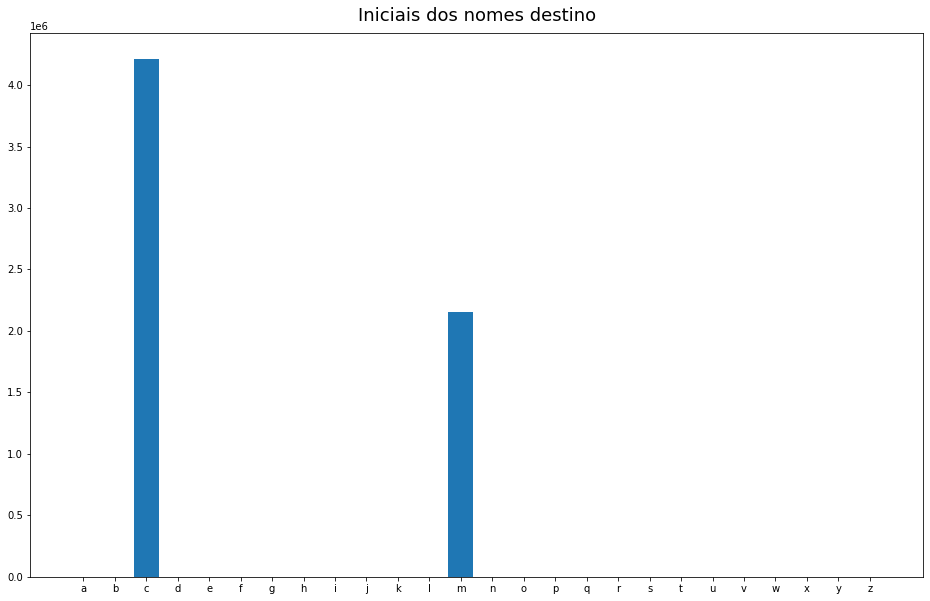

In [201]:
plt.bar(*zip(*nome_dest_dict.items()));
plt.title("Iniciais dos nomes destino", fontdict={'fontsize':18}, pad=12);

**1.4 - Visualizar variáveis numéricas**

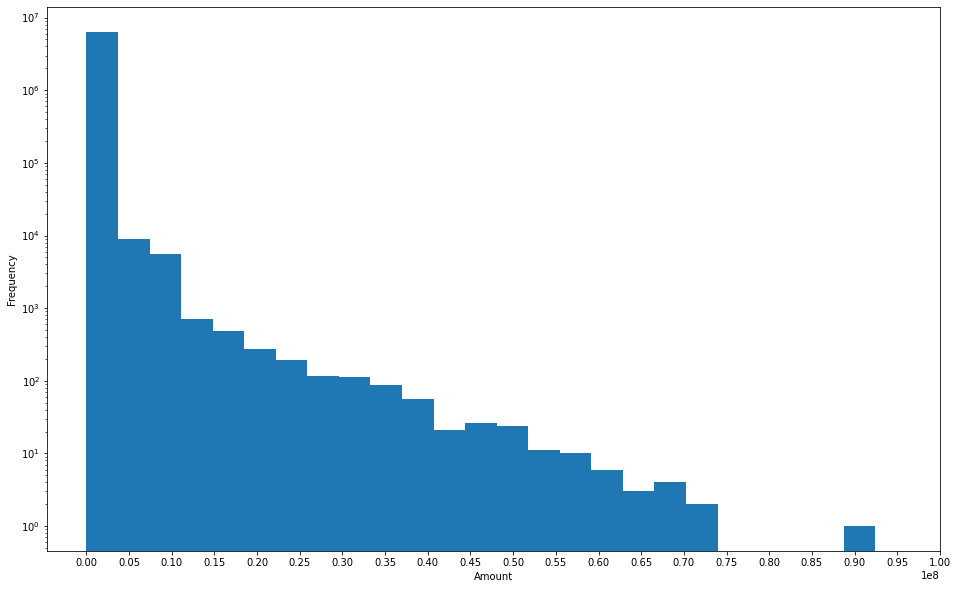

In [202]:
plt.hist(df['amount'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(1.05*1e8),int(5*1e6)))
plt.xlabel('Amount');

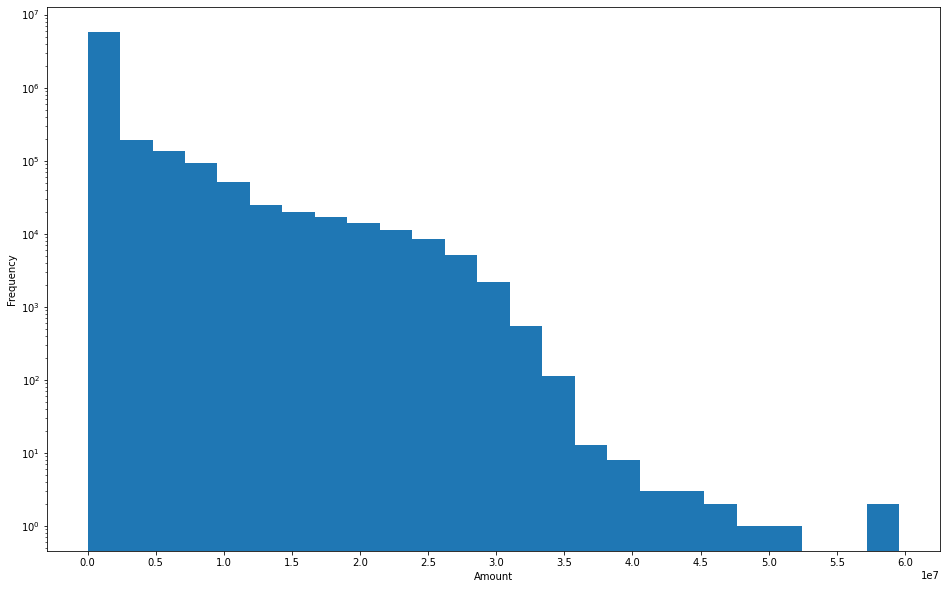

In [203]:
plt.hist(df['oldbalanceOrg'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(6.5*1e7),int(5*1e6)))
plt.xlabel('Amount');

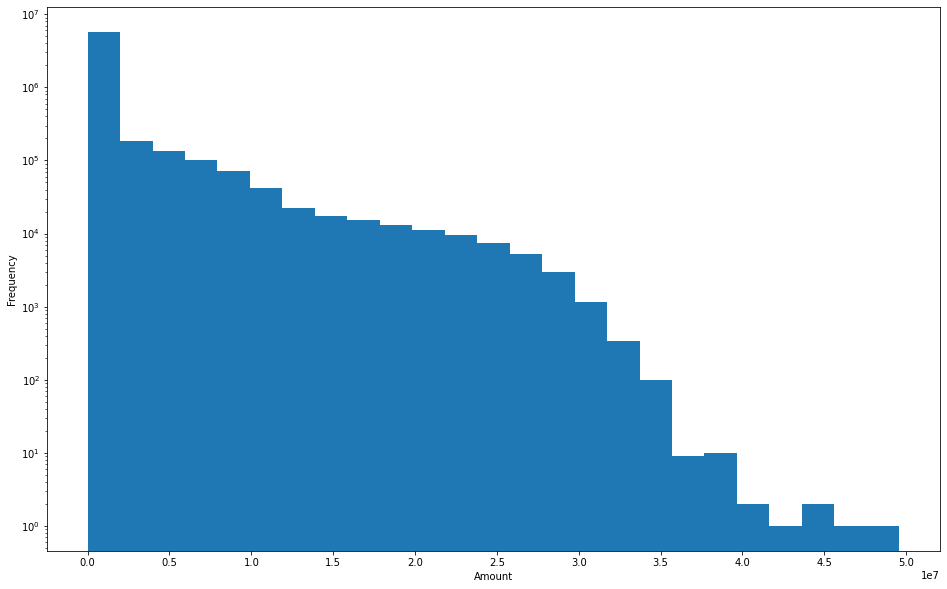

In [204]:
plt.hist(df['newbalanceOrig'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(5.5*1e7),int(5*1e6)))
plt.xlabel('Amount');

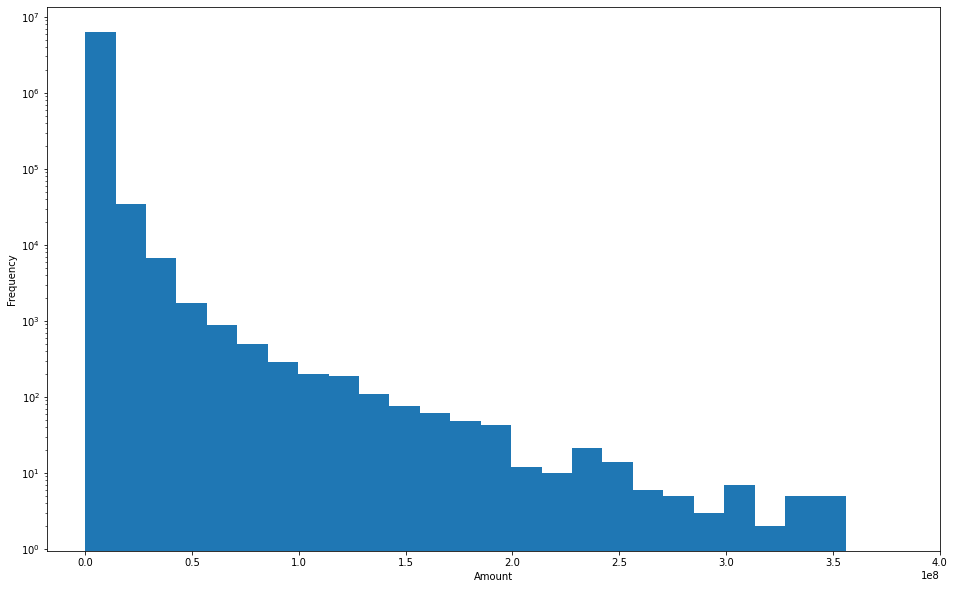

In [205]:
plt.hist(df['oldbalanceDest'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(4.5*1e8),int(5*1e7)))
plt.xlabel('Amount');

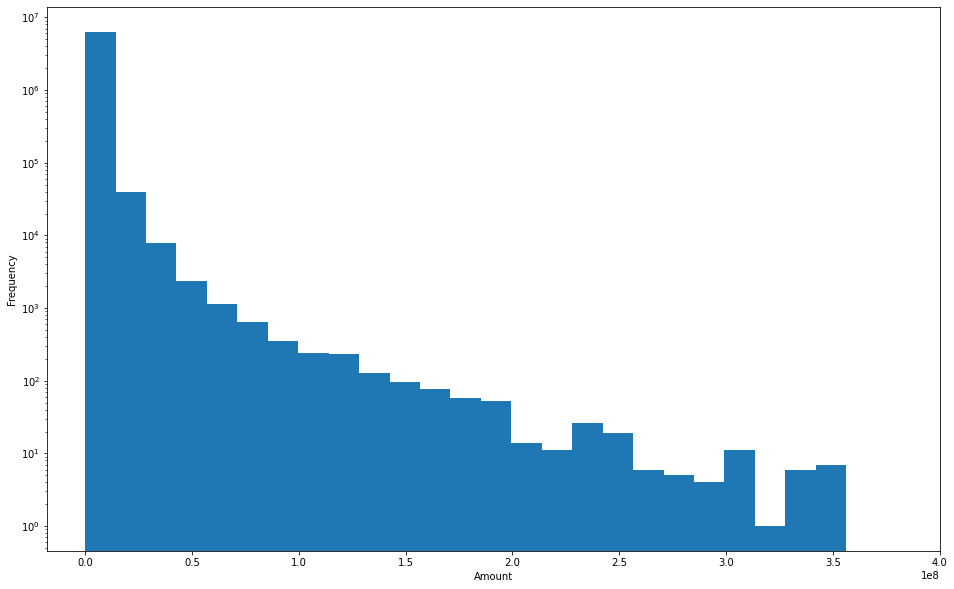

In [206]:
plt.hist(df['newbalanceDest'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(4.5*1e8),int(5*1e7)))
plt.xlabel('Amount');

**1.5 - Matriz Correlação**

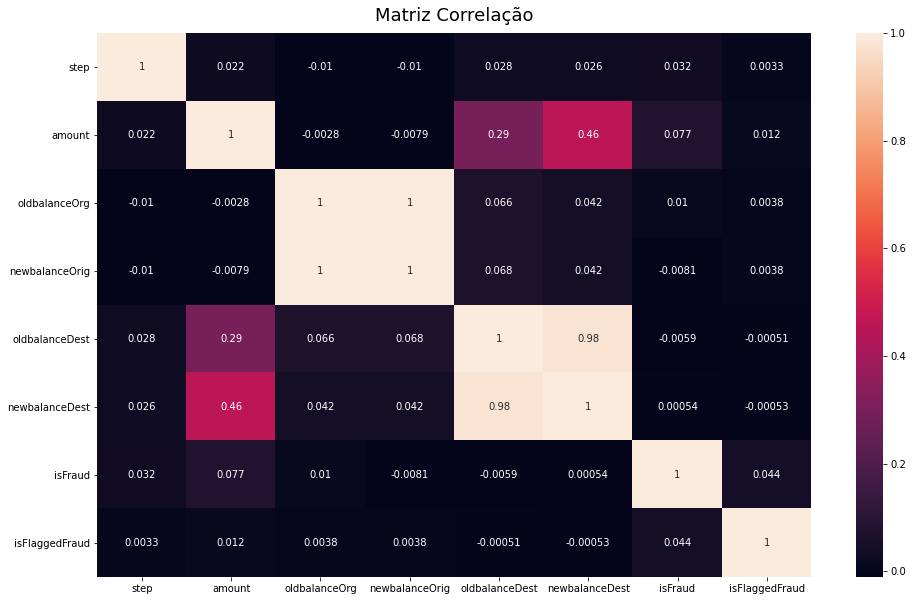

In [207]:
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Matriz Correlação', fontdict={'fontsize':18}, pad=12);